In [19]:
import pandas as pd
from wine_functions import concat_dataframes, fetch_wine_data, load_red_wine_data, load_white_wine_data, add_color_feature, concat_dataframes, split_dataset

# fetch_wine_data()

red_wine = load_red_wine_data()
white_wine = load_white_wine_data()
add_color_feature(red_wine, white_wine)
wine = concat_dataframes(red_wine, white_wine)

train, train_labels, test, test_lables = split_dataset(wine)

In [20]:
explore_wine = pd.concat([train, train_labels], axis=1)

explore_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
3123,6.6,0.21,0.49,18.15,0.042,41.0,158.0,0.99970,3.28,0.39,8.7,0,6
196,7.3,0.58,0.30,2.40,0.074,15.0,55.0,0.99680,3.46,0.59,10.2,1,5
1704,7.3,0.13,0.32,14.40,0.051,34.0,109.0,0.99740,3.20,0.35,9.2,0,6
3417,6.0,0.26,0.29,1.00,0.032,27.0,96.0,0.98960,3.38,0.44,12.3,0,6
4422,7.6,0.27,0.34,5.00,0.040,18.0,56.0,0.99084,3.06,0.48,12.4,0,6


In [21]:
explore_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 3123 to 1864
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5197 non-null   float64
 1   volatile acidity      5197 non-null   float64
 2   citric acid           5197 non-null   float64
 3   residual sugar        5197 non-null   float64
 4   chlorides             5197 non-null   float64
 5   free sulfur dioxide   5197 non-null   float64
 6   total sulfur dioxide  5197 non-null   float64
 7   density               5197 non-null   float64
 8   pH                    5197 non-null   float64
 9   sulphates             5197 non-null   float64
 10  alcohol               5197 non-null   float64
 11  color                 5197 non-null   int64  
 12  quality               5197 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 568.4 KB


In [22]:
explore_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.210054,0.339649,0.318834,5.421916,0.055900,30.459207,115.604387,0.994680,3.219155,0.531522,10.498011,0.246104,5.824322
std,1.299903,0.166077,0.145743,4.773142,0.034522,17.702082,56.279088,0.003002,0.161689,0.147089,1.192811,0.430781,0.870857
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.770000,0.220000,8.000000,0.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992280,3.110000,0.430000,9.500000,0.000000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,0.000000,6.000000
75%,7.700000,0.400000,0.400000,8.100000,0.065000,41.000000,155.000000,0.997000,3.320000,0.600000,11.300000,0.000000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,1.980000,14.900000,1.000000,9.000000


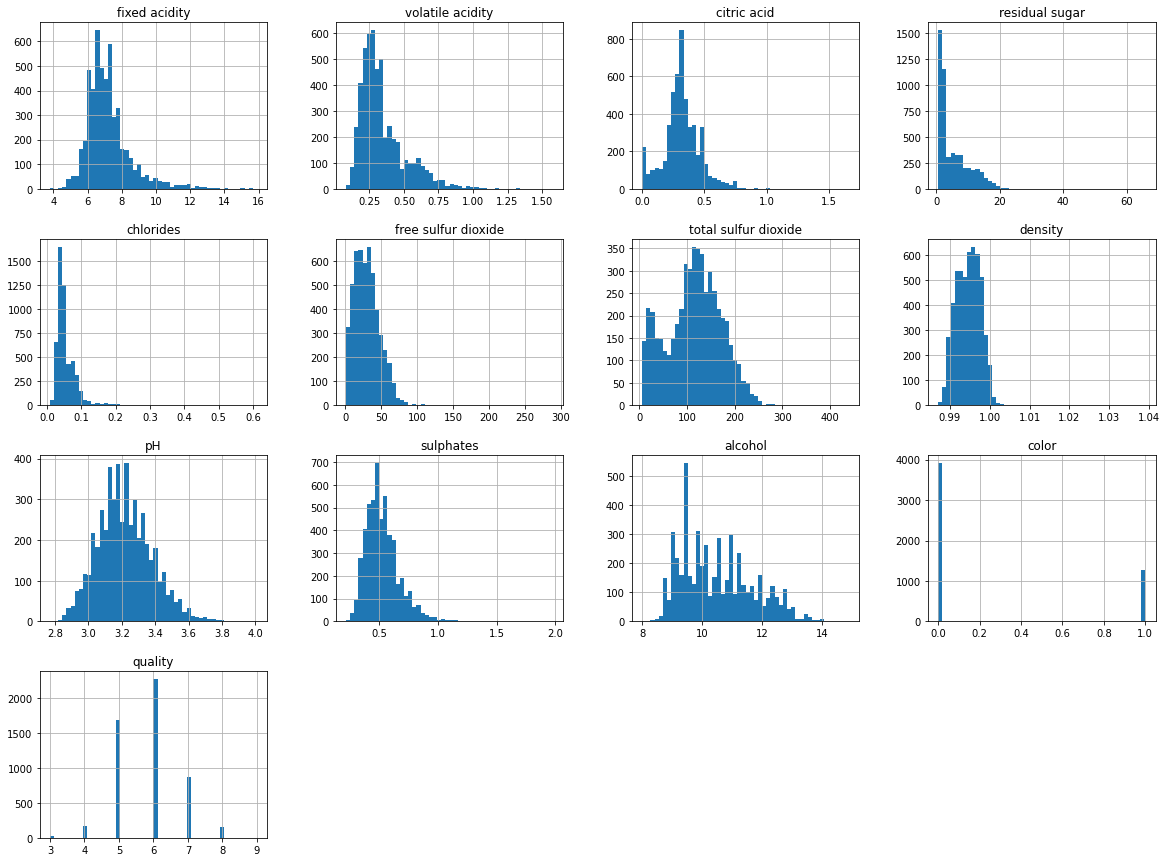

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
explore_wine.hist(bins=50, figsize=(20,15))
plt.show()

# different scales, and tail-heavy

In [24]:
corr_matrix = explore_wine.corr()

corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.443582
citric acid             0.093642
free sulfur dioxide     0.062555
sulphates               0.040596
pH                      0.017179
residual sugar         -0.033984
total sulfur dioxide   -0.038363
fixed acidity          -0.084864
color                  -0.122768
chlorides              -0.203183
volatile acidity       -0.269857
density                -0.308041
Name: quality, dtype: float64

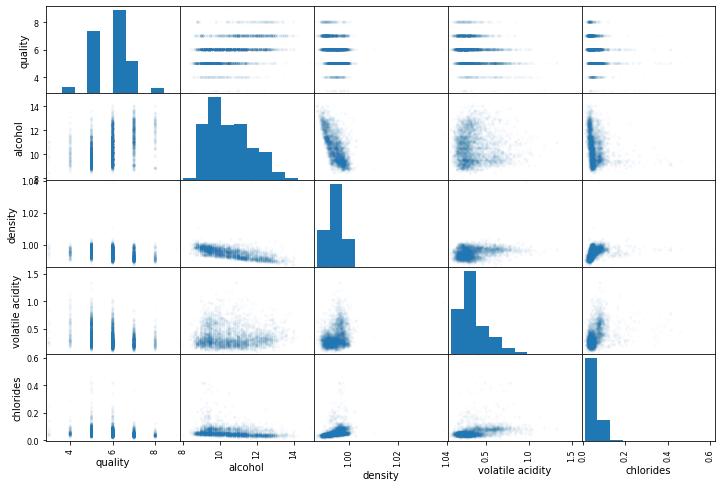

In [25]:
from pandas.plotting import scatter_matrix

attributes_1 = ["quality", "alcohol", "density", "volatile acidity", "chlorides"]
scatter_matrix(explore_wine[attributes_1], figsize=(12, 8), alpha=0.025)
plt.show()

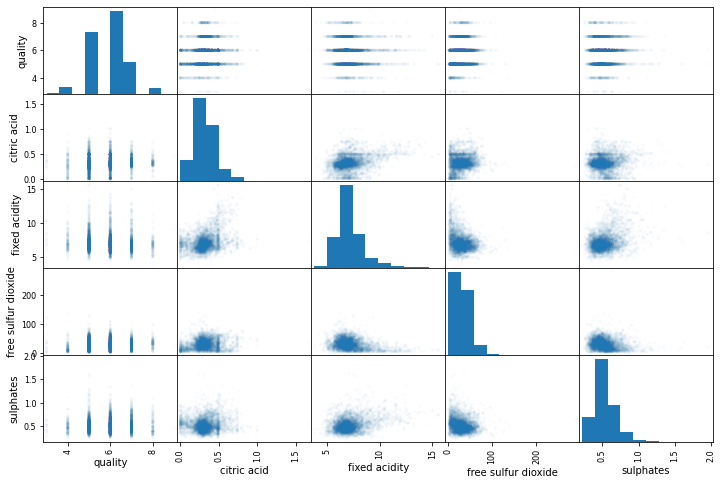

In [26]:
attributes_2 = ["quality", "citric acid", "fixed acidity", "free sulfur dioxide", "sulphates"]
scatter_matrix(explore_wine[attributes_2], figsize=(12, 8), alpha=0.025)
plt.show()

In [27]:
explore_wine["free sulfur dioxide percentage"] = explore_wine["free sulfur dioxide"]/explore_wine["total sulfur dioxide"]

corr_matrix = explore_wine.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                           1.000000
alcohol                           0.443582
free sulfur dioxide percentage    0.119756
citric acid                       0.093642
free sulfur dioxide               0.062555
sulphates                         0.040596
pH                                0.017179
residual sugar                   -0.033984
total sulfur dioxide             -0.038363
fixed acidity                    -0.084864
color                            -0.122768
chlorides                        -0.203183
volatile acidity                 -0.269857
density                          -0.308041
Name: quality, dtype: float64

<AxesSubplot:xlabel='free sulfur dioxide percentage', ylabel='quality'>

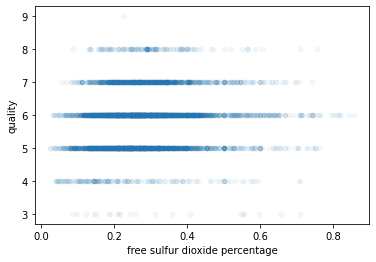

In [30]:
explore_wine.plot(kind="scatter", x="free sulfur dioxide percentage", y="quality", alpha=0.05)